MAKİNE ÖĞRENMESİ İLE İŞE ALIM SÜRECİ OPTİMİZASYONU

İş Problemi

İnsan kaynakları departmanları, işe alım süreçlerinde büyük miktarda başvuru arasından en uygun adayları belirlemek için zaman ve emek harcamaktadır. Bu projede, makine öğrenmesi teknikleri kullanılarak, adayların özelliklerine göre işe alınıp alınmayacaklarını tahmin eden bir model geliştirilmesi amaçlanmaktadır.

Makine öğrenmesi algoritmaları sayesinde, adayların eğitim seviyesi, teknik becerileri, iş tecrübesi, mental sağlık durumu ve maaş beklentileri gibi veriler analiz edilerek, işe alınma olasılığı hesaplanacaktır. Böylece, işe alım süreçleri daha hızlı ve verimli hale getirilebilir.

Veri Seti Hikayesi

Age: Adayın yaşı (kategori olarak verilmiştir: <35, 35-50, 50+)

Accessibility: Adayın engellilik durumu

EdLevel: Eğitim seviyesi (Master, Undergraduate, PhD, Other, NoHigherEd)

Employment: Mevcut çalışma durumu

Gender: Cinsiyet bilgisi

MentalHealth: Mental sağlık durumu

MainBranch: Adayın ana çalışma alanı

YearsCode: Kodlama deneyimi (yıl olarak)

YearsCodePro: Profesyonel kodlama deneyimi (yıl olarak)

Country: Adayın yaşadığı ülke

PreviousSalary: Adayın önceki işinde aldığı maaş (USD cinsinden)

HaveWorkedWith: Daha önce kullanılan teknolojiler

ComputerSkills: Teknik beceri seviyesi (puan olarak)

Employed: (Hedef değişken) Adayın işe alınıp alınmadığını belirten binary değişken (1: İşe alındı, 0: İşe alınmadı)

In [1]:
# Gerekli Kütüphaneleri Yükleme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
### Veri Setini Yükleme
df = pd.read_csv("/Users/kaanmac/Desktop/Machine-Learning/job_applicants.csv")
df=df.copy()
df.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1.0,Man,No,Dev,7.0,4.0,Sweden,51552.0,C++;Python;Git;PostgreSQL,4.0,0.0
1,1,<35,No,Undergraduate,1.0,Man,No,Dev,12.0,5.0,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12.0,1.0
2,2,<35,No,Master,1.0,Man,No,Dev,15.0,6.0,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7.0,0.0
3,3,<35,No,Undergraduate,1.0,Man,No,Dev,9.0,6.0,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13.0,0.0
4,4,>35,No,PhD,0.0,Man,No,NotDev,40.0,30.0,Singapore,160932.0,C++;Python,2.0,0.0


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1.0,Man,No,Dev,7.0,4.0,Sweden,51552.0,C++;Python;Git;PostgreSQL,4.0,0.0
1,<35,No,Undergraduate,1.0,Man,No,Dev,12.0,5.0,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12.0,1.0
2,<35,No,Master,1.0,Man,No,Dev,15.0,6.0,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7.0,0.0
3,<35,No,Undergraduate,1.0,Man,No,Dev,9.0,6.0,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13.0,0.0
4,>35,No,PhD,0.0,Man,No,NotDev,40.0,30.0,Singapore,160932.0,C++;Python,2.0,0.0


In [5]:
df

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1.0,Man,No,Dev,7.0,4.0,Sweden,51552.0,C++;Python;Git;PostgreSQL,4.0,0.0
1,<35,No,Undergraduate,1.0,Man,No,Dev,12.0,5.0,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12.0,1.0
2,<35,No,Master,1.0,Man,No,Dev,15.0,6.0,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7.0,0.0
3,<35,No,Undergraduate,1.0,Man,No,Dev,9.0,6.0,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13.0,0.0
4,>35,No,PhD,0.0,Man,No,NotDev,40.0,30.0,Singapore,160932.0,C++;Python,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5972,<35,No,Master,1.0,Man,No,Dev,17.0,11.0,Germany,83236.0,Bash/Shell;HTML/CSS;Java;JavaScript;Kotlin;Pyt...,15.0,0.0
5973,<35,No,Master,1.0,Man,No,Dev,11.0,2.0,Germany,48000.0,Bash/Shell;Java;JavaScript;Node.js;SQL;TypeScr...,13.0,1.0
5974,<35,No,Other,0.0,Man,No,Dev,4.0,2.0,Bangladesh,7068.0,Assembly;Bash/Shell;C;C#;C++;HTML/CSS;Java;Jav...,18.0,1.0
5975,>35,No,Master,1.0,Man,No,Dev,15.0,13.0,Germany,75669.0,HTML/CSS;Java;JavaScript;Node.js;TypeScript;Do...,19.0,1.0


In [6]:
### Veri Seti Açıklaması
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5977 entries, 0 to 5976
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             5977 non-null   object 
 1   Accessibility   5977 non-null   object 
 2   EdLevel         5977 non-null   object 
 3   Employment      5976 non-null   float64
 4   Gender          5976 non-null   object 
 5   MentalHealth    5976 non-null   object 
 6   MainBranch      5976 non-null   object 
 7   YearsCode       5976 non-null   float64
 8   YearsCodePro    5976 non-null   float64
 9   Country         5976 non-null   object 
 10  PreviousSalary  5976 non-null   float64
 11  HaveWorkedWith  5971 non-null   object 
 12  ComputerSkills  5976 non-null   float64
 13  Employed        5976 non-null   float64
dtypes: float64(6), object(8)
memory usage: 653.9+ KB
None
        Employment    YearsCode  YearsCodePro  PreviousSalary  ComputerSkills  \
count  5976.000000  5976.000000  

In [7]:
### Eksik Verileri Kontrol Etme
print(df.isnull().sum())

Age               0
Accessibility     0
EdLevel           0
Employment        1
Gender            1
MentalHealth      1
MainBranch        1
YearsCode         1
YearsCodePro      1
Country           1
PreviousSalary    1
HaveWorkedWith    6
ComputerSkills    1
Employed          1
dtype: int64


In [8]:
# Eksik değer içeren satırları filtreleme
missing_rows = df[df[['Country', 'PreviousSalary', 'HaveWorkedWith']].isna().any(axis=1)]

# Eksik değer içeren satırları görüntüleme
missing_rows

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
1161,>35,No,Undergraduate,1.0,Man,Yes,Dev,36.0,32.0,Switzerland,96566.0,NaN,0.0,0.0
2443,>35,No,Other,1.0,Man,No,Dev,7.0,6.0,United States of America,85000.0,NaN,0.0,0.0
2533,>35,No,PhD,1.0,Man,No,NotDev,37.0,0.0,Germany,76020.0,NaN,0.0,0.0
2657,<35,No,Master,0.0,Woman,No,Dev,11.0,5.0,Portugal,31428.0,NaN,0.0,0.0
5797,<35,No,Undergraduate,1.0,Man,No,Dev,8.0,4.0,India,70368.0,NaN,0.0,0.0
5976,<35,No,Undergr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.drop(index=5976, inplace=True)

In [10]:
# Eksik değer içeren satırları filtreleme
missing_rows = df[df[['Country', 'PreviousSalary', 'HaveWorkedWith']].isna().any(axis=1)]

# Eksik değer içeren satırları görüntüleme
missing_rows

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
1161,>35,No,Undergraduate,1.0,Man,Yes,Dev,36.0,32.0,Switzerland,96566.0,NaN,0.0,0.0
2443,>35,No,Other,1.0,Man,No,Dev,7.0,6.0,United States of America,85000.0,NaN,0.0,0.0
2533,>35,No,PhD,1.0,Man,No,NotDev,37.0,0.0,Germany,76020.0,NaN,0.0,0.0
2657,<35,No,Master,0.0,Woman,No,Dev,11.0,5.0,Portugal,31428.0,NaN,0.0,0.0
5797,<35,No,Undergraduate,1.0,Man,No,Dev,8.0,4.0,India,70368.0,NaN,0.0,0.0


In [11]:
# Kategorik Verileri Dönüştürme
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['Accessibility'] = le.fit_transform(df['Accessibility'])
df['Employment'] = le.fit_transform(df['Employment'])
df['Gender'] = le.fit_transform(df['Gender'])
df['MentalHealth'] = le.fit_transform(df['MentalHealth'])
df['MainBranch'] = le.fit_transform(df['MainBranch'])
df['Employed'] = df['Employed'].astype(int)
df['ComputerSkills'] = df['ComputerSkills'].astype(int)
df['YearsCode'] = df['YearsCode'].astype(int)
df['YearsCodePro'] = df['YearsCodePro'].astype(int)
df['PreviousSalary'] = df['PreviousSalary'].astype(int)

In [12]:
unique_values = df['EdLevel'].unique()
print("EdLevel sütunundaki kategoriler:", unique_values)

EdLevel sütunundaki kategoriler: ['Master' 'Undergraduate' 'PhD' 'Other' 'NoHigherEd']


In [13]:
df = pd.get_dummies(df, columns=['EdLevel'], prefix='EdLevel')

In [14]:
df = df.drop(columns=['Country'])
df = df.drop(columns=['HaveWorkedWith'])

In [16]:
df

,Age,Accessibility,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate
0,0,0,1,0,0,0,7,4,51552,4,0,1,0,0,0,0
1,0,0,1,0,0,0,12,5,46482,12,1,0,0,0,0,1
2,0,0,1,0,0,0,15,6,77290,7,0,1,0,0,0,0
3,0,0,1,0,0,0,9,6,46135,13,0,0,0,0,0,1
4,1,0,0,0,0,1,40,30,160932,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,0,0,1,0,0,0,13,6,19776,17,1,0,0,0,0,1
5972,0,0,1,0,0,0,17,11,83236,15,0,1,0,0,0,0
5973,0,0,1,0,0,0,11,2,48000,13,1,1,0,0,0,0
5974,0,0,0,0,0,0,4,2,7068,18,1,0,0,1,0,0


In [17]:
# Özellik ve Hedef Değişken Ayırma
X = df.drop("Employed", axis=1)
y = df["Employed"]

In [18]:
#  Veri Setini Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Veri Standardizasyonu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
#  Makine Öğrenmesi Modeli Eğitme
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
#  Modelin Test Edilmesi
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Skoru: {accuracy:.2f}")

Doğruluk Skoru: 0.77


In [22]:
# Sonuçların Değerlendirilmesi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       574
           1       0.79      0.74      0.77       622

    accuracy                           0.77      1196
   macro avg       0.77      0.77      0.77      1196
weighted avg       0.77      0.77      0.77      1196



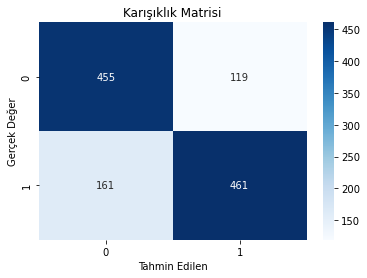

In [23]:
# Karışıklık Matrisi (Confusion Matrix)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Karışıklık Matrisi")
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [25]:
# En iyi parametrelerle modeli oluştur
best_model = RandomForestClassifier(
    max_depth=10, 
    min_samples_leaf=2, 
    min_samples_split=5, 
    n_estimators=100, 
    random_state=42
)

# Modeli eğit
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

Yeni Doğruluk Skoru: 0.78
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       574
           1       0.80      0.77      0.79       622

    accuracy                           0.78      1196
   macro avg       0.78      0.78      0.78      1196
weighted avg       0.78      0.78      0.78      1196



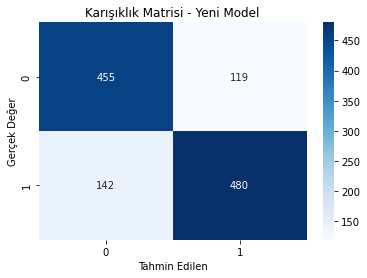

In [26]:
# Yeni model ile tahmin yap
y_pred = best_model.predict(X_test)

# Yeni doğruluk skorunu hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"Yeni Doğruluk Skoru: {accuracy:.2f}")

# Detaylı performans raporu al
print(classification_report(y_test, y_pred))

# Karışıklık Matrisi (Confusion Matrix) çizdir
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Karışıklık Matrisi - Yeni Model")
plt.show()

In [27]:
!pip install xgboost

In [28]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Doğruluk Skoru: 0.77
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       574
           1       0.80      0.75      0.78       622

    accuracy                           0.77      1196
   macro avg       0.77      0.77      0.77      1196
weighted avg       0.77      0.77      0.77      1196



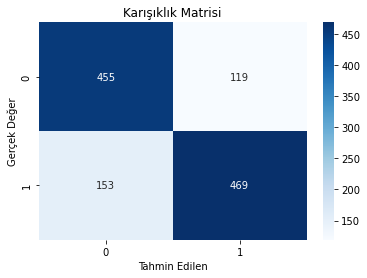

In [29]:
# Modeli test veri seti üzerinde tahmin yaparak değerlendir
y_pred = model.predict(X_test)

# Doğruluk oranını hesapla
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Skoru: {accuracy:.2f}")

# Sınıflandırma raporunu görüntüle
print(classification_report(y_test, y_pred))

# Karışıklık Matrisi
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Değer")
plt.title("Karışıklık Matrisi")
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

# Grid Search
grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# En iyi parametreleri yazdır
print("En iyi parametreler:", grid_search.best_params_)

# En iyi modeli kullanarak tahmin yap
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Güncellenmiş doğruluk skorunu yazdır
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"İyileştirilmiş Doğruluk Skoru: {accuracy_best:.2f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}
İyileştirilmiş Doğruluk Skoru: 0.78
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200; total time=   0.1s
[CV] END